In [1]:
import pandas as pd
import numpy as np
# %matplotlib notebook # Uncomment this if you want an interactive 3D graph below. (problematic)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
sns.set()

In [39]:
df_raw = pd.read_csv(r"..\Data Set\credit_risk_dataset.csv")#,low_memory=False)
df_raw.shape

(32581, 12)

In [40]:
df_raw.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [41]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Encoding Categorical Features

In [42]:
# person_home_ownership
pers_h_own_label=LabelEncoder()
pers_h_own_label.fit(df_raw["person_home_ownership"])
df_raw["person_home_ownership_enc"]=pers_h_own_label.transform(df_raw["person_home_ownership"]);

In [43]:
pers_h_own_label.classes_

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)

In [44]:
pers_h_own_label.transform(pers_h_own_label.classes_)

array([0, 1, 2, 3])

In [45]:
# loan_intent
loan_intent_label=LabelEncoder()
loan_intent_label.fit(df_raw["loan_intent"])
df_raw["loan_intent_enc"]=loan_intent_label.transform(df_raw["loan_intent"]);

In [46]:
loan_intent_label.classes_

array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE'], dtype=object)

In [47]:
loan_intent_label.transform(loan_intent_label.classes_)

array([0, 1, 2, 3, 4, 5])

In [48]:
# loan_grade
loan_grade_label=LabelEncoder()
loan_grade_label.fit(df_raw["loan_grade"])
df_raw["loan_grade_enc"]=loan_grade_label.transform(df_raw["loan_grade"]);

In [49]:
loan_grade_label.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [51]:
loan_grade_label.transform(loan_grade_label.classes_)

array([0, 1, 2, 3, 4, 5, 6])

We're not going to use any more categorical features except these ones. 

# Dealing with NaN values

In [12]:
pd.DataFrame(df_raw.isna().value_counts())

0
person_age person_income person_home_ownership person_emp_length loan_intent loan_grade loan_amnt loan_int_rate loan_status loan_percent_income cb_person_default_on_file cb_person_cred_hist_length       
False      False         False                 False             False       False      False     False         False       False               False                     False                       28638
                                                                                                  True          False       False               False                     False                        3048
                                               True              False       False      False     False         False       False               False                     False                         827
                                                                                                  True          False       False               False                     False                          68

person_emp_length has 827 + 68 NaN values

loan_int_rate has 3048 + 68 NaN values

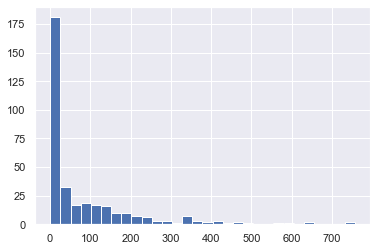

In [19]:
plt.hist(df_raw["loan_int_rate"].value_counts(), bins=30);

In [23]:
df_raw.dropna(inplace=False).shape

(28638, 12)

We're droping the rows with NaN. It's just almost 4 thousand observations, but I don't have time today to do data preprocessing... =D
I'll improve this one day... :)

In [64]:
df_raw=df_raw.dropna()
df_raw.to_csv(r"..\Data Set\Data_No_NaN.csv",index=False)

# Outputting the final data

In [65]:
Y=df_raw["loan_status"]
X=df_raw[["person_age","person_income","person_home_ownership_enc",
          "person_emp_length",'loan_intent_enc',
         'loan_grade_enc','loan_amnt','loan_int_rate','loan_percent_income']]

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_age                 28638 non-null  int64  
 1   person_income              28638 non-null  int64  
 2   person_home_ownership_enc  28638 non-null  int32  
 3   person_emp_length          28638 non-null  float64
 4   loan_intent_enc            28638 non-null  int32  
 5   loan_grade_enc             28638 non-null  int32  
 6   loan_amnt                  28638 non-null  int64  
 7   loan_int_rate              28638 non-null  float64
 8   loan_percent_income        28638 non-null  float64
dtypes: float64(3), int32(3), int64(3)
memory usage: 1.9 MB


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                 random_state=123 # just for replicability. remove later. 
                )

In [68]:
X_train.to_csv(r"..\Data Set\X_train.csv",index=False)
X_test.to_csv(r"..\Data Set\X_test.csv",index=False)
Y_train.to_csv(r"..\Data Set\Y_train.csv",index=False)
Y_test.to_csv(r"..\Data Set\Y_test.csv",index=False)